# Визуализация теоремы о пределе суммы

Графическая иллюстрация доказательства: если $\lim_{n \to \infty} a_n = A$ и $\lim_{n \to \infty} b_n = B$, то $\lim_{n \to \infty} (a_n + b_n) = A + B$

**Пример:**
- $a_n = 1 + \frac{1}{n} \to 1$ (монотонная последовательность)
- $b_n = 2 + \frac{\sin(n)}{n} \to 2$ (с колебаниями, немонотонная!)
- $(a_n + b_n) \to 3$

**Важно:** Теорема работает даже для последовательностей с колебаниями! 🌊


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'

# Настройка для красивых графиков
rcParams['font.size'] = 11
rcParams['figure.figsize'] = (14, 10)
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.3

# Определяем последовательности
def a_n(n):
    """a_n = 1 + 1/n → 1 (монотонная)"""
    return 1 + 1/n

def b_n(n):
    """b_n = 2 + sin(n)/n → 2 (извилистая с колебаниями!)"""
    return 2 + np.sin(n) / n

def sum_n(n):
    """(a_n + b_n) → 3"""
    return a_n(n) + b_n(n)

# Пределы
A = 1
B = 2
A_plus_B = 3

print("Последовательности определены!")
print(f"a_n = 1 + 1/n → {A} (монотонная)")
print(f"b_n = 2 + sin(n)/n → {B} (с колебаниями!)")
print(f"(a_n + b_n) → {A_plus_B}")
print(f"\n✨ Теорема работает даже для немонотонных последовательностей!")
print(f"(a_n + b_n) → {A_plus_B}")


Последовательности определены!
a_n = 1 + 1/n → 1 (монотонная)
b_n = 2 + sin(n)/n → 2 (с колебаниями!)
(a_n + b_n) → 3

✨ Теорема работает даже для немонотонных последовательностей!
(a_n + b_n) → 3


## График 1: Три последовательности и их пределы


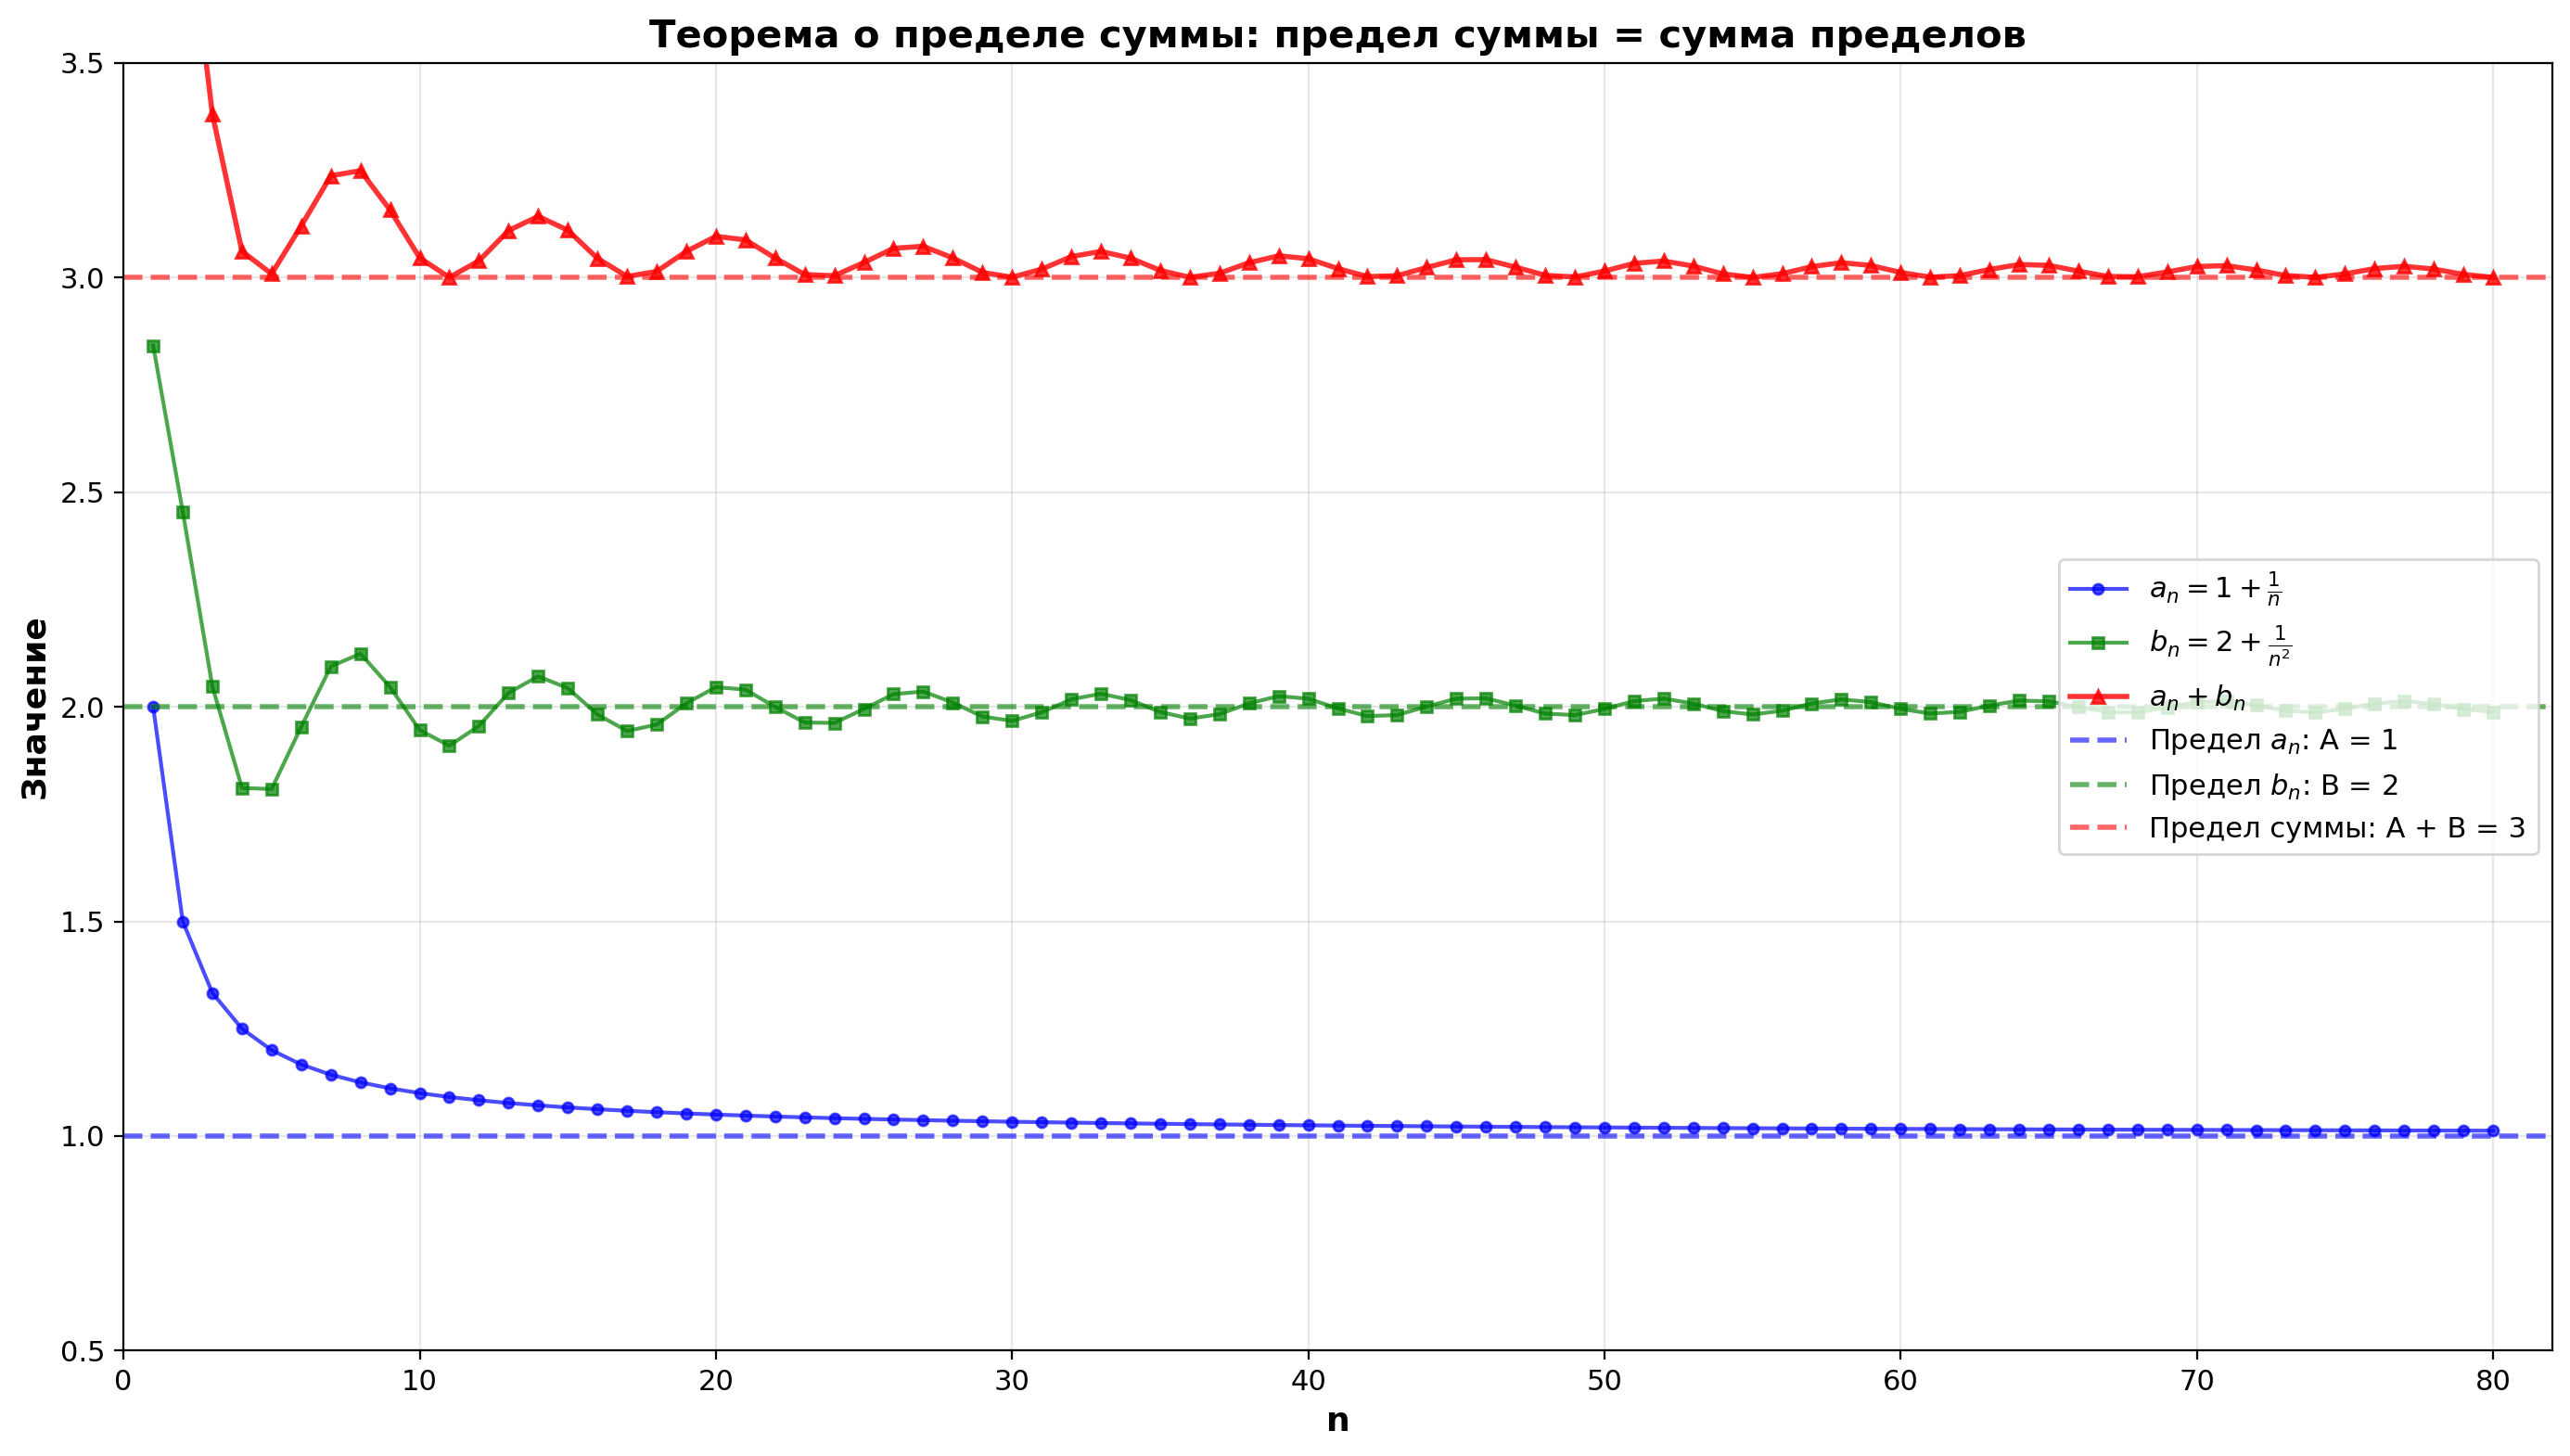


✓ Видно, что a_n стремится к 1
✓ Видно, что b_n стремится к 2
✓ Видно, что (a_n + b_n) стремится к 3 = 1 + 2


In [66]:
# Значения n
n_values = np.arange(1, 81)
a_values = a_n(n_values)
b_values = b_n(n_values)
sum_values = sum_n(n_values)

# Создаём график
fig, ax = plt.subplots(figsize=(14, 8))

# Рисуем последовательности
ax.plot(n_values, a_values, 'o-', label=r'$a_n = 1 + \frac{1}{n}$', 
        color='blue', markersize=4, alpha=0.7)
ax.plot(n_values, b_values, 's-', label=r'$b_n = 2 + \frac{1}{n^2}$', 
        color='green', markersize=4, alpha=0.7)
ax.plot(n_values, sum_values, '^-', label=r'$a_n + b_n$', 
        color='red', markersize=5, linewidth=2, alpha=0.8)

# Рисуем пределы (горизонтальные линии)
ax.axhline(y=A, color='blue', linestyle='--', linewidth=2, 
           label=f'Предел $a_n$: A = {A}', alpha=0.6)
ax.axhline(y=B, color='green', linestyle='--', linewidth=2, 
           label=f'Предел $b_n$: B = {B}', alpha=0.6)
ax.axhline(y=A_plus_B, color='red', linestyle='--', linewidth=2, 
           label=f'Предел суммы: A + B = {A_plus_B}', alpha=0.6)

ax.set_xlabel('n', fontsize=13, fontweight='bold')
ax.set_ylabel('Значение', fontsize=13, fontweight='bold')
ax.set_title('Теорема о пределе суммы: предел суммы = сумма пределов', 
             fontsize=15, fontweight='bold')
ax.legend(loc='right', fontsize=11)
ax.set_xlim(0, 82)
ax.set_ylim(0.5, 3.5)

plt.tight_layout()
plt.show()

print(f"\n✓ Видно, что a_n стремится к {A}")
print(f"✓ Видно, что b_n стремится к {B}")  
print(f"✓ Видно, что (a_n + b_n) стремится к {A_plus_B} = {A} + {B}")


## График 2: Иллюстрация с ε-коридорами

Покажем, как работает доказательство с конкретным $\varepsilon = 0.1$


ε = 0.08
Делим НЕРАВНОМЕРНО: ε₁ = 0.06 (для a_n), ε₂ = 0.02 (для b_n)

Для a_n = 1 + 1/n:
  Нужно |1/n| < 0.06  →  n > 16.666666666666668  →  N₁ = 17

Для b_n = 2 + sin(n)/n:
  Нужно |sin(n)/n| < 0.02
  Используем |sin(n)|/n ≤ 1/n < 0.02  →  n > 50.00  →  N₂ = 50

⚡ РАЗНЫЕ N! N₂ = 50 > N₁ = 17
   b_n требует большее N (меньший запас ε₂ = 0.02 < ε₁ = 0.06)!

Берём N = max(N₁, N₂) = max(17, 50) = 50
✓ После n > 50 обе последовательности в своих коридорах
✓ Сумма гарантированно в ε-коридоре: ε₁ + ε₂ = 0.06 + 0.02 = 0.08


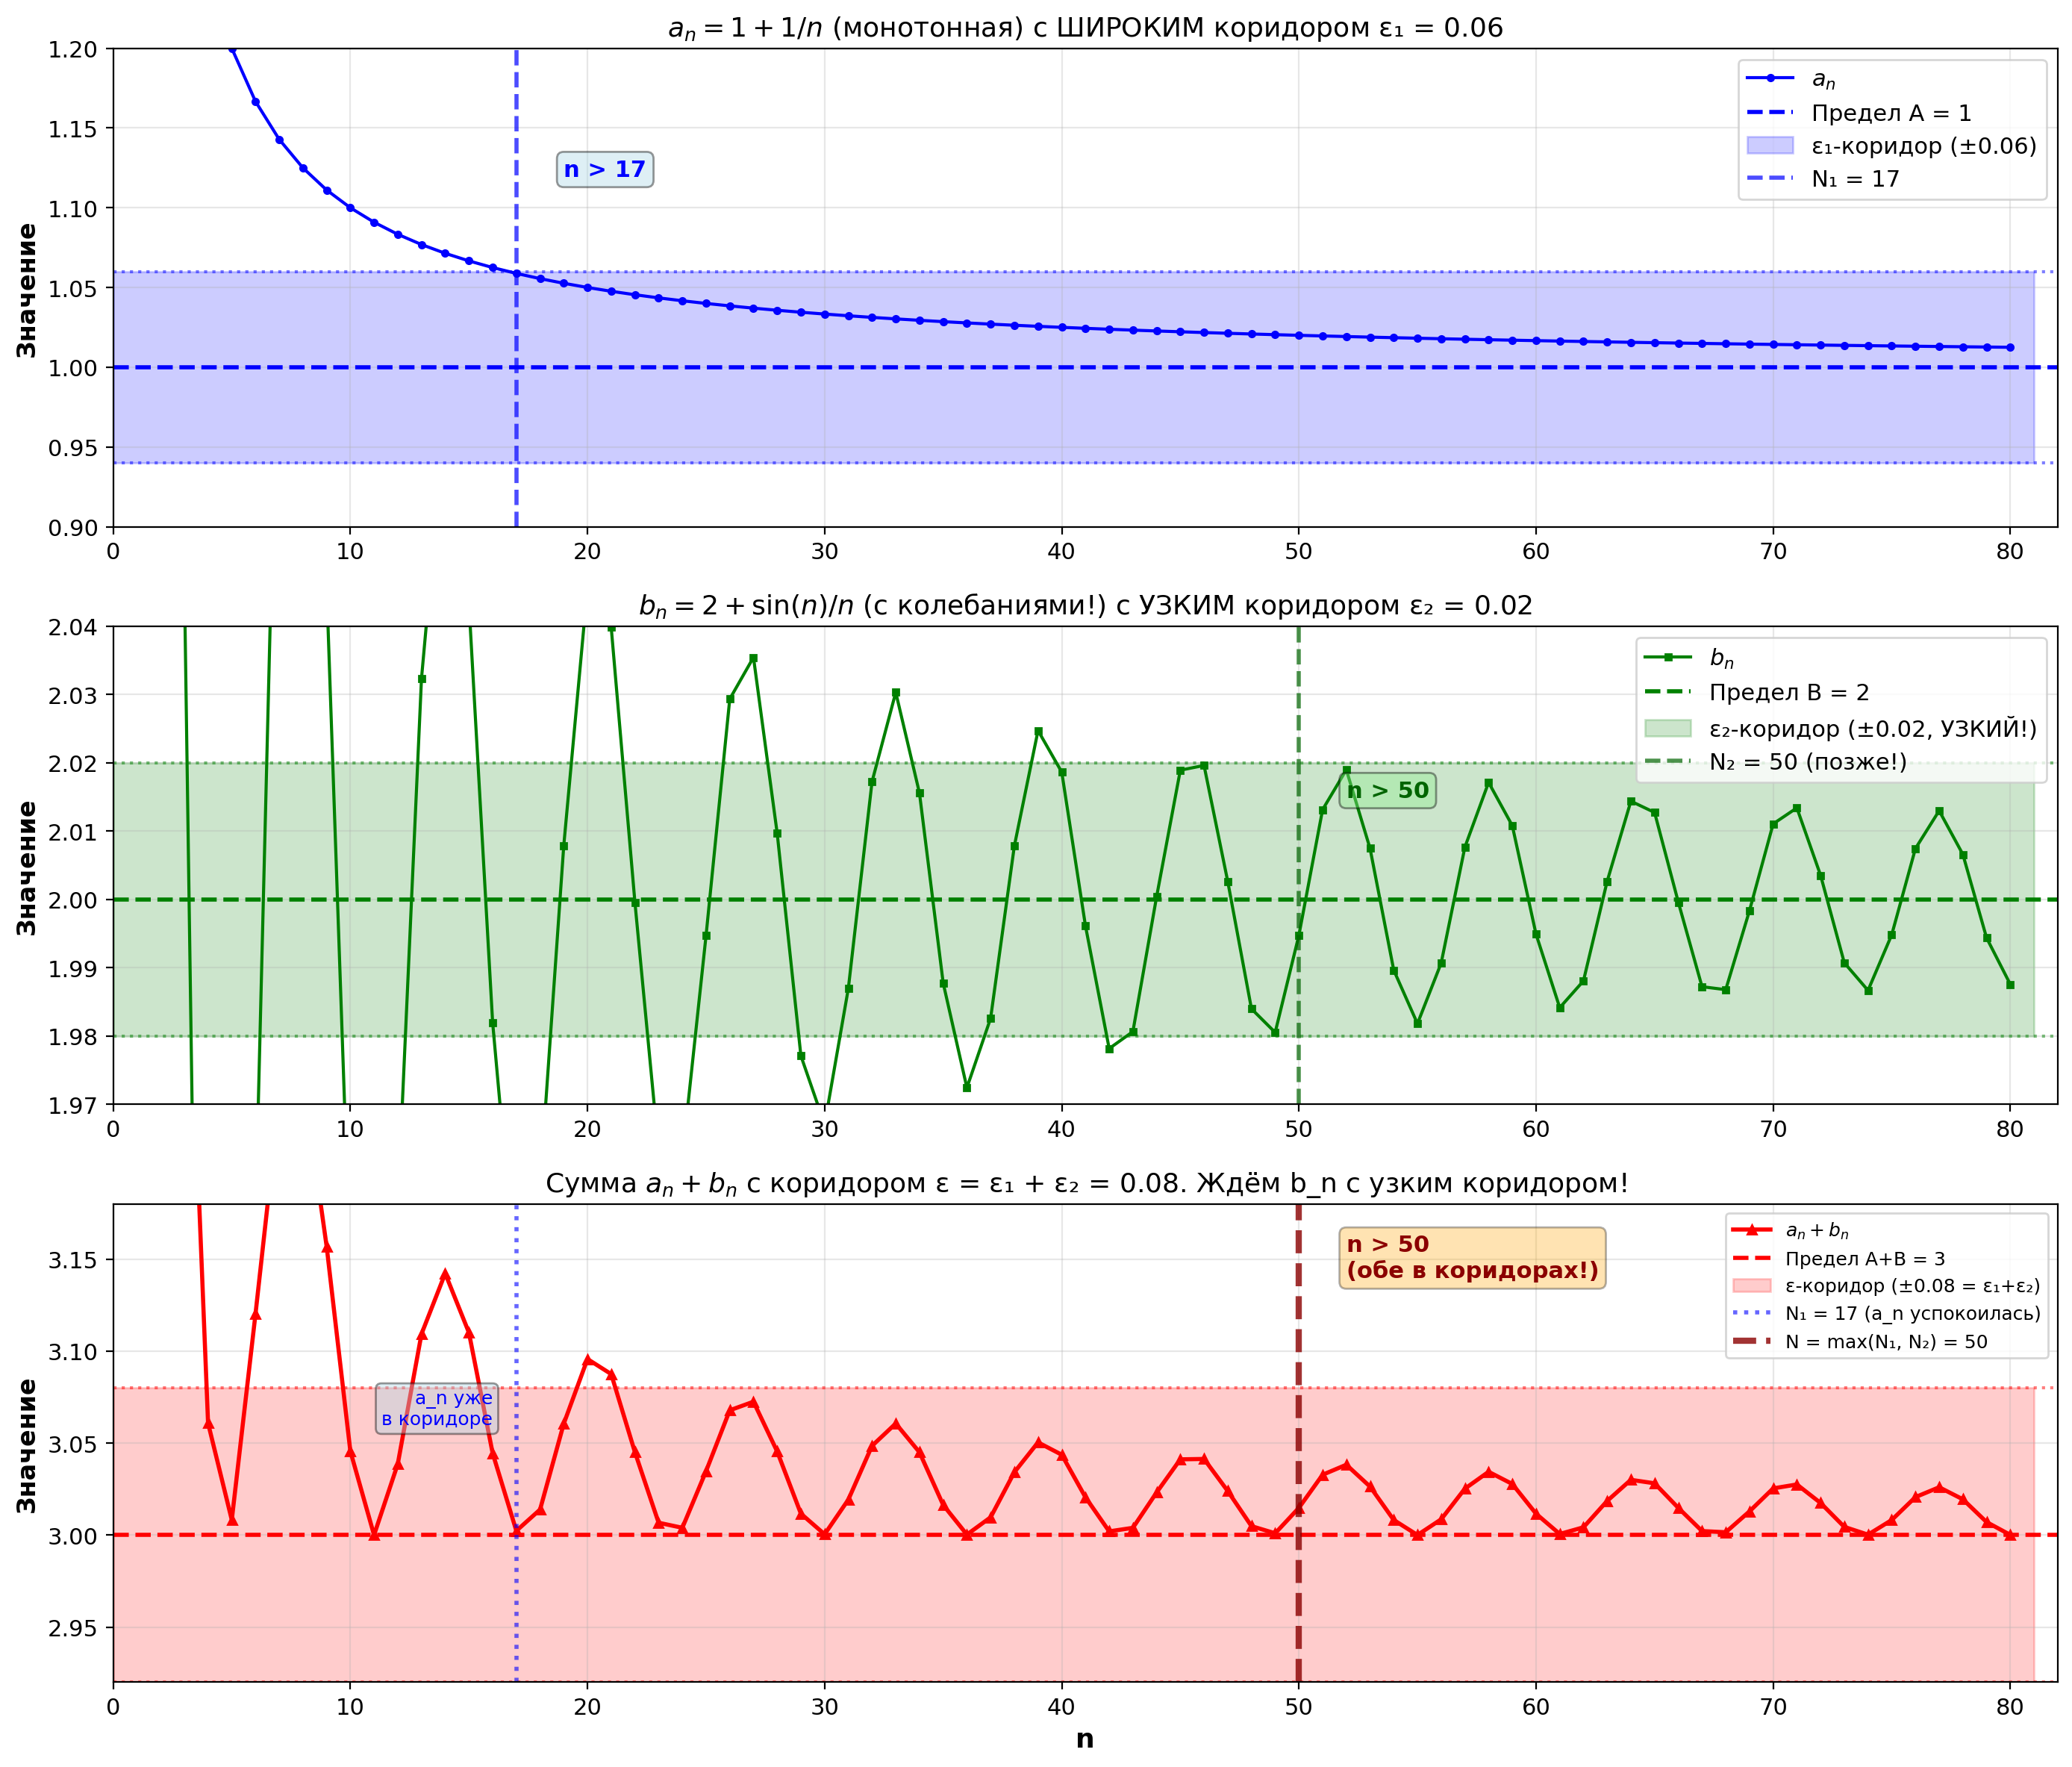


КЛЮЧЕВОЕ НАБЛЮДЕНИЕ:
✓ После n = 17, последовательность a_n в своём коридоре ε₁ = 0.06
✓ После n = 50, последовательность b_n в своём коридоре ε₂ = 0.02
✓ После n = 50 = max(17, 50), ОБЕ в своих коридорах!
✓ Поэтому сумма ГАРАНТИРОВАННО в ε-коридоре!
✓ ε₁ + ε₂ = ε:  0.06 + 0.02 = 0.08


In [ ]:
# Параметры
# Трюк для получения РАЗНЫХ N₁ и N₂: делим epsilon НЕРАВНОМЕРНО!
epsilon_1 = 0.06  # доля для a_n (широкий коридор)
epsilon_2 = 0.02  # доля для b_n (узкий коридор!)
epsilon = epsilon_1 + epsilon_2  # общий epsilon для суммы

# Находим N1 и N2
# Для a_n = 1 + 1/n: |a_n - 1| = 1/n < ε₁
#   → n > 1/ε₁
N1 = int(np.ceil(1 / epsilon_1))

# Для b_n = 2 + sin(n)/n: |b_n - 2| = |sin(n)|/n ≤ 1/n < ε₂
#   → n > 1/ε₂ (используем оценку |sin(n)| ≤ 1)
N2 = int(np.ceil(1 / epsilon_2))

N = max(N1, N2)

print(f"ε = {epsilon}")
print(f"Делим НЕРАВНОМЕРНО: ε₁ = {epsilon_1} (для a_n), ε₂ = {epsilon_2} (для b_n)")
print(f"\nДля a_n = 1 + 1/n:")
print(f"  Нужно |1/n| < {epsilon_1}  →  n > {1/epsilon_1}  →  N₁ = {N1}")
print(f"\nДля b_n = 2 + sin(n)/n:")
print(f"  Нужно |sin(n)/n| < {epsilon_2}")
print(f"  Используем |sin(n)|/n ≤ 1/n < {epsilon_2}  →  n > {1/epsilon_2:.2f}  →  N₂ = {N2}")
print(f"\n⚡ РАЗНЫЕ N! N₂ = {N2} > N₁ = {N1}")
print(f"   b_n требует большее N (меньший запас ε₂ = {epsilon_2} < ε₁ = {epsilon_1})!")
print(f"\nБерём N = max(N₁, N₂) = max({N1}, {N2}) = {N}")
print(f"✓ После n > {N} обе последовательности в своих коридорах")
print(f"✓ Сумма гарантированно в ε-коридоре: ε₁ + ε₂ = {epsilon_1} + {epsilon_2} = {epsilon}")

# Значения для графика
n_vals = np.arange(1, 81)
a_vals = a_n(n_vals)
b_vals = b_n(n_vals)
sum_vals = sum_n(n_vals)

# Создаём три подграфика
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

# ===== График 1: a_n с ε₁-коридором =====
ax1.plot(n_vals, a_vals, 'o-', color='blue', markersize=3, label=r'$a_n$')
ax1.axhline(y=A, color='blue', linestyle='--', linewidth=2, label=f'Предел A = {A}')

# Коридор для a_n (ε₁)
ax1.fill_between([0, 81], A - epsilon_1, A + epsilon_1, 
                  alpha=0.2, color='blue', label=f'ε₁-коридор (±{epsilon_1})')
ax1.axhline(y=A + epsilon_1, color='blue', linestyle=':', alpha=0.5)
ax1.axhline(y=A - epsilon_1, color='blue', linestyle=':', alpha=0.5)

# Отмечаем N1
ax1.axvline(x=N1, color='blue', linestyle='--', linewidth=2, alpha=0.7, label=f'N₁ = {N1}')
ax1.text(N1 + 2, 1.12, f'n > {N1}', fontsize=11, color='blue', fontweight='bold', 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.4))

ax1.set_ylabel('Значение', fontsize=12, fontweight='bold')
ax1.set_title(f'$a_n = 1 + 1/n$ (монотонная) с ШИРОКИМ коридором ε₁ = {epsilon_1}', fontsize=13)
ax1.legend(loc='upper right')
ax1.set_xlim(0, 82)
ax1.set_ylim(0.9, 1.2)
ax1.grid(True, alpha=0.3)

# ===== График 2: b_n с ε₂-коридором =====
ax2.plot(n_vals, b_vals, 's-', color='green', markersize=3, label=r'$b_n$')
ax2.axhline(y=B, color='green', linestyle='--', linewidth=2, label=f'Предел B = {B}')

# Коридор для b_n (ε₂) - УЗКИЙ коридор!
ax2.fill_between([0, 81], B - epsilon_2, B + epsilon_2, 
                  alpha=0.2, color='green', label=f'ε₂-коридор (±{epsilon_2}, УЗКИЙ!)')
ax2.axhline(y=B + epsilon_2, color='green', linestyle=':', alpha=0.5)
ax2.axhline(y=B - epsilon_2, color='green', linestyle=':', alpha=0.5)

# Отмечаем N2
ax2.axvline(x=N2, color='darkgreen', linestyle='--', linewidth=2, alpha=0.7, label=f'N₂ = {N2} (позже!)')
ax2.text(N2 + 2, B + 0.015, f'n > {N2}', fontsize=11, color='darkgreen', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.4))

ax2.set_ylabel('Значение', fontsize=12, fontweight='bold')
ax2.set_title(f'$b_n = 2 + \\sin(n)/n$ (с колебаниями!) с УЗКИМ коридором ε₂ = {epsilon_2}', fontsize=13)
ax2.legend(loc='upper right')
ax2.set_xlim(0, 82)
ax2.set_ylim(1.97, 2.04)
ax2.grid(True, alpha=0.3)

# ===== График 3: сумма с ε-коридором =====
ax3.plot(n_vals, sum_vals, '^-', color='red', markersize=4, linewidth=2, label=r'$a_n + b_n$')
ax3.axhline(y=A_plus_B, color='red', linestyle='--', linewidth=2, label=f'Предел A+B = {A_plus_B}')

# Коридор для суммы (ε = ε₁ + ε₂)
ax3.fill_between([0, 81], A_plus_B - epsilon, A_plus_B + epsilon, 
                  alpha=0.2, color='red', label=f'ε-коридор (±{epsilon} = ε₁+ε₂)')
ax3.axhline(y=A_plus_B + epsilon, color='red', linestyle=':', alpha=0.5)
ax3.axhline(y=A_plus_B - epsilon, color='red', linestyle=':', alpha=0.5)

# Отмечаем N1 (a_n успокоилась первой - больший коридор)
ax3.axvline(x=N1, color='blue', linestyle=':', linewidth=2, alpha=0.6, label=f'N₁ = {N1} (a_n успокоилась)')

# Отмечаем N2 = N = max(N1, N2) (b_n успокоилась позже - меньший коридор!)
ax3.axvline(x=N, color='darkred', linestyle='--', linewidth=3, alpha=0.8, label=f'N = max(N₁, N₂) = {N}')
ax3.text(N + 2, 3.14, f'n > {N}\n(обе в коридорах!)', fontsize=11, color='darkred', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))

# Подпись для N1
if N1 < 80:
    ax3.text(N1 - 1, 3.06, f'a_n уже\nв коридоре', fontsize=9, color='blue', ha='right',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.4))

ax3.set_xlabel('n', fontsize=13, fontweight='bold')
ax3.set_ylabel('Значение', fontsize=12, fontweight='bold')
ax3.set_title(f'Сумма $a_n + b_n$ с коридором ε = ε₁ + ε₂ = {epsilon}. Ждём b_n с узким коридором!', fontsize=13)
ax3.legend(loc='upper right', fontsize=9)
ax3.set_xlim(0, 82)
ax3.set_ylim(2.92, 3.18)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"КЛЮЧЕВОЕ НАБЛЮДЕНИЕ:")
print(f"{'='*60}")
print(f"✓ После n = {N1}, последовательность a_n в своём коридоре ε₁ = {epsilon_1}")
print(f"✓ После n = {N2}, последовательность b_n в своём коридоре ε₂ = {epsilon_2}")
print(f"✓ После n = {N} = max({N1}, {N2}), ОБЕ в своих коридорах!")
print(f"✓ Поэтому сумма ГАРАНТИРОВАННО в ε-коридоре!")
print(f"✓ ε₁ + ε₂ = ε:  {epsilon_1} + {epsilon_2} = {epsilon}")


## График 3: Проверка для конкретного n = 21

Покажем на столбиковой диаграмме, как отклонения складываются


Проверка для n = 21:
a_21 = 1.047619, предел A = 1  →  отклонение = 0.047619
b_21 = 2.039841, предел B = 2  →  отклонение = 0.039841
Сумма = 3.087460, предел = 3  →  отклонение = 0.087460

✓ Сумма отклонений: 0.047619 + 0.039841 = 0.087460
✓ Меньше ε? 0.087460 < 0.08 = False


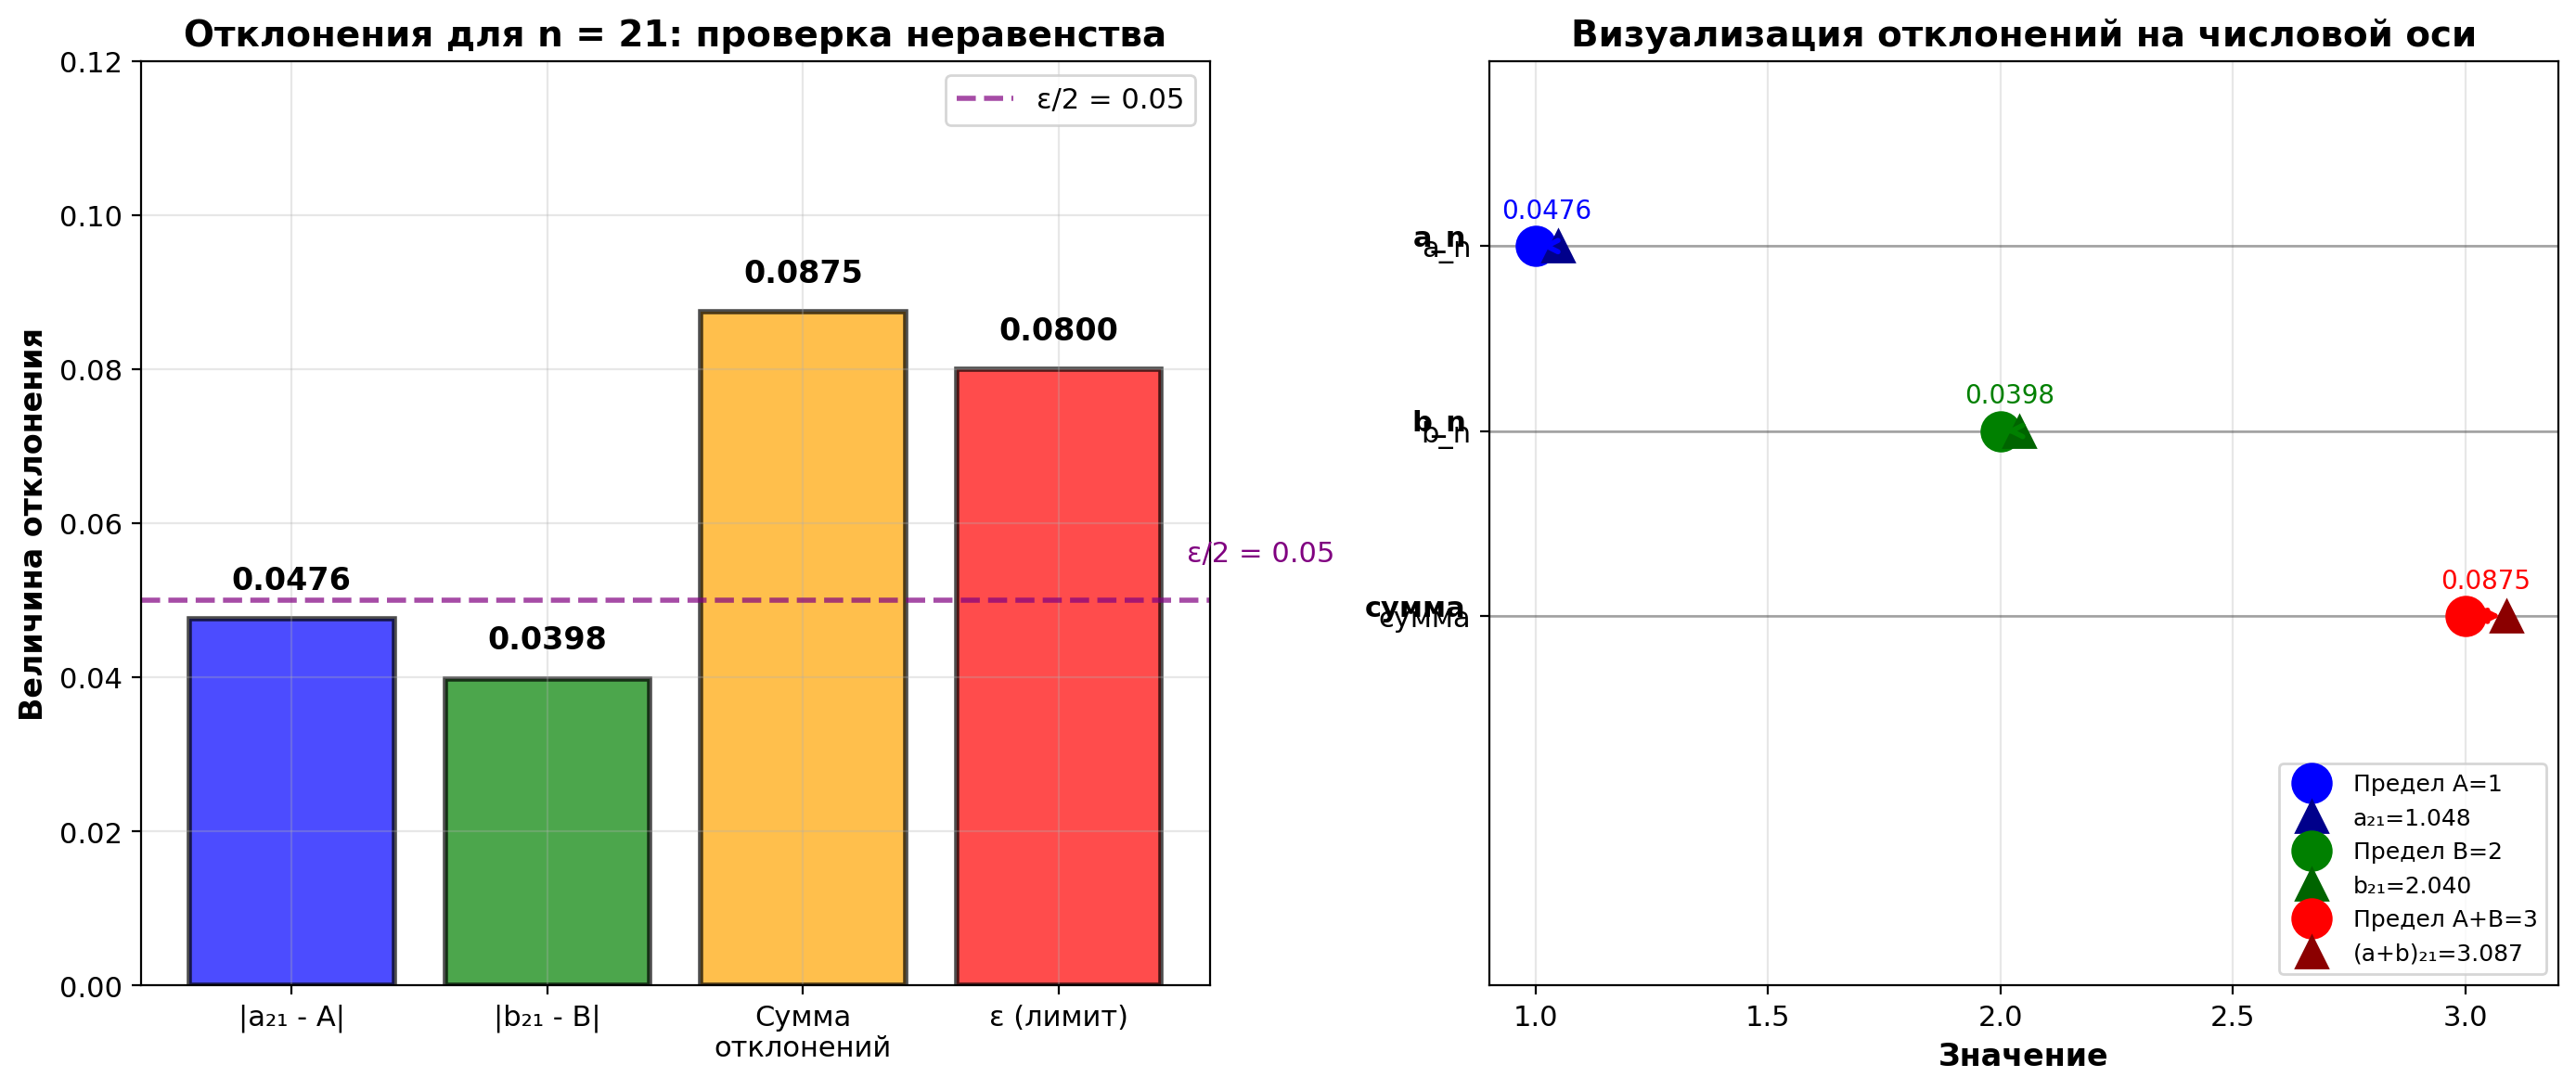


ВЫВОД:
✓ Каждое отклонение < ε/2 = 0.05
✓ Сумма отклонений < ε = 0.08
✓ Неравенство треугольника работает! ✓✓✓


In [68]:
# Проверка для n = 21
n_check = 21
a_21 = a_n(n_check)
b_21 = b_n(n_check)
sum_21 = sum_n(n_check)

deviation_a = abs(a_21 - A)
deviation_b = abs(b_21 - B)
deviation_sum = abs(sum_21 - A_plus_B)

print(f"Проверка для n = {n_check}:")
print(f"{'='*60}")
print(f"a_{n_check} = {a_21:.6f}, предел A = {A}  →  отклонение = {deviation_a:.6f}")
print(f"b_{n_check} = {b_21:.6f}, предел B = {B}  →  отклонение = {deviation_b:.6f}")
print(f"Сумма = {sum_21:.6f}, предел = {A_plus_B}  →  отклонение = {deviation_sum:.6f}")
print(f"\n✓ Сумма отклонений: {deviation_a:.6f} + {deviation_b:.6f} = {deviation_a + deviation_b:.6f}")
print(f"✓ Меньше ε? {deviation_a + deviation_b:.6f} < {epsilon} = {deviation_a + deviation_b < epsilon}")

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ==== График 1: Столбики отклонений ====
categories = ['|a₂₁ - A|', '|b₂₁ - B|', 'Сумма\nотклонений', 'ε (лимит)']
values = [deviation_a, deviation_b, deviation_a + deviation_b, epsilon]
colors = ['blue', 'green', 'orange', 'red']

bars = ax1.bar(categories, values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Добавляем значения на столбики
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.003,
             f'{val:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Линия ε/2
ax1.axhline(y=epsilon_half, color='purple', linestyle='--', linewidth=2, 
            label=f'ε/2 = {epsilon_half}', alpha=0.7)
ax1.text(3.5, epsilon_half + 0.005, f'ε/2 = {epsilon_half}', fontsize=11, color='purple')

ax1.set_ylabel('Величина отклонения', fontsize=12, fontweight='bold')
ax1.set_title(f'Отклонения для n = {n_check}: проверка неравенства', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 0.12)
ax1.grid(True, axis='y', alpha=0.3)
ax1.legend()

# ==== График 2: Визуализация на числовой оси ====
ax2.set_xlim(0.9, 3.2)
ax2.set_ylim(-1, 4)

# Рисуем оси для каждой последовательности
y_positions = [3, 2, 1, 0]
labels = ['a_n', 'b_n', 'сумма', '']

for i, (y_pos, label) in enumerate(zip(y_positions[:3], labels)):
    # Горизонтальная линия
    ax2.plot([0.9, 3.2], [y_pos, y_pos], 'k-', alpha=0.3, linewidth=1)
    ax2.text(0.85, y_pos, label, fontsize=11, fontweight='bold', ha='right')

# a_n: предел и значение
ax2.plot(A, 3, 'o', color='blue', markersize=15, label=f'Предел A={A}')
ax2.plot(a_21, 3, '^', color='darkblue', markersize=12, label=f'a₂₁={a_21:.3f}')
ax2.annotate('', xy=(a_21, 3), xytext=(A, 3),
             arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
ax2.text((A + a_21)/2, 3.15, f'{deviation_a:.4f}', fontsize=10, ha='center', color='blue')

# b_n: предел и значение  
ax2.plot(B, 2, 'o', color='green', markersize=15, label=f'Предел B={B}')
ax2.plot(b_21, 2, '^', color='darkgreen', markersize=12, label=f'b₂₁={b_21:.3f}')
ax2.annotate('', xy=(b_21, 2), xytext=(B, 2),
             arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax2.text((B + b_21)/2, 2.15, f'{deviation_b:.4f}', fontsize=10, ha='center', color='green')

# сумма: предел и значение
ax2.plot(A_plus_B, 1, 'o', color='red', markersize=15, label=f'Предел A+B={A_plus_B}')
ax2.plot(sum_21, 1, '^', color='darkred', markersize=12, label=f'(a+b)₂₁={sum_21:.3f}')
ax2.annotate('', xy=(sum_21, 1), xytext=(A_plus_B, 1),
             arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax2.text((A_plus_B + sum_21)/2, 1.15, f'{deviation_sum:.4f}', fontsize=10, ha='center', color='red')

ax2.set_xlabel('Значение', fontsize=12, fontweight='bold')
ax2.set_title('Визуализация отклонений на числовой оси', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', fontsize=9)
ax2.set_yticks(y_positions[:3])
ax2.set_yticklabels(labels[:3])
ax2.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"ВЫВОД:")
print(f"{'='*60}")
print(f"✓ Каждое отклонение < ε/2 = {epsilon_half}")
print(f"✓ Сумма отклонений < ε = {epsilon}")
print(f"✓ Неравенство треугольника работает! ✓✓✓")


## Резюме: что показывают графики

Эти графики визуализируют **каждый шаг доказательства**:

1. **График 1** показывает, что обе последовательности действительно стремятся к своим пределам, и их сумма стремится к сумме пределов
   - Обратите внимание: $b_n$ **колеблется** (из-за $\sin(n)$), но всё равно стремится к 2!
   - Это показывает, что теорема работает не только для монотонных последовательностей

2. **График 2** (три подграфика) показывает:
   - Как каждая последовательность попадает в свой **коридор** (ε₁ для $a_n$, ε₂ для $b_n$)
   - $b_n$ **зигзагами** входит в коридор (немонотонная!)
   - ⚡ **КЛЮЧЕВОЙ МОМЕНТ**: они "успокаиваются" в **РАЗНОЕ ВРЕМЯ**!
     - $a_n$ имеет **широкий коридор** ε₁ = 0.06 → N₁ ≈ 17 (успокаивается раньше)
     - $b_n$ имеет **узкий коридор** ε₂ = 0.02 → N₂ = 50 (требует ГОРАЗДО больше времени!)
   - Как мы берём **N = max(N₁, N₂)** для синхронизации (ждём ту, у которой узкий коридор!)
   - Что после N сумма **гарантированно** в ε-коридоре (даже с колебаниями!)

3. **График 3** показывает конкретную проверку:
   - Столбики: наглядно видно, что сумма отклонений < ε
   - Числовая ось: визуализация расстояний от пределов

**Ключевые идеи:**
- 🌊 Теорема работает даже для **немонотонных** последовательностей с колебаниями!
- ⚡ **РАЗНЫЕ N₁ и N₂** — это нормально! Мы можем выбирать разные ε₁ и ε₂
- 📏 **Гибкость выбора**: не обязательно делить ε поровну! Можем дать одной последовательности больший "запас"
- ➕ **ε₁ + ε₂ = ε**: если каждая последовательность в своём коридоре, сумма в общем коридоре
- 🎯 Не важно, КАК последовательность стремится к пределу (монотонно или зигзагами) — важно только, ЧТО она стремится!
- ⏰ Берём max(N₁, N₂) — "ждём ту, которая позже успокоится"
